#Load data

In [51]:
import pandas as pd
data = pd.read_csv('data.csv', encoding='latin-1')
print(data.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75  

#PreProcessing

##Null Value

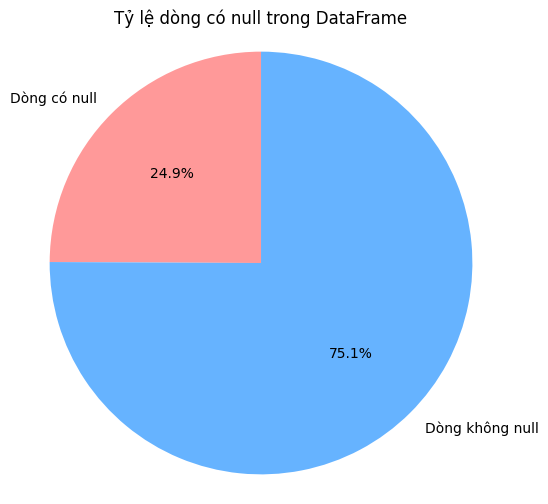

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn
tong_so_dong = len(data)
so_dong_null = data.isnull().any(axis=1).sum()
so_dong_khong_null = tong_so_dong - so_dong_null

# Dữ liệu cho biểu đồ tròn
labels = ['Dòng có null', 'Dòng không null']
sizes = [so_dong_null, so_dong_khong_null]
colors = ['#ff9999','#66b3ff']

# Vẽ biểu đồ
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ dòng có null trong DataFrame')
plt.axis('equal')
plt.show()


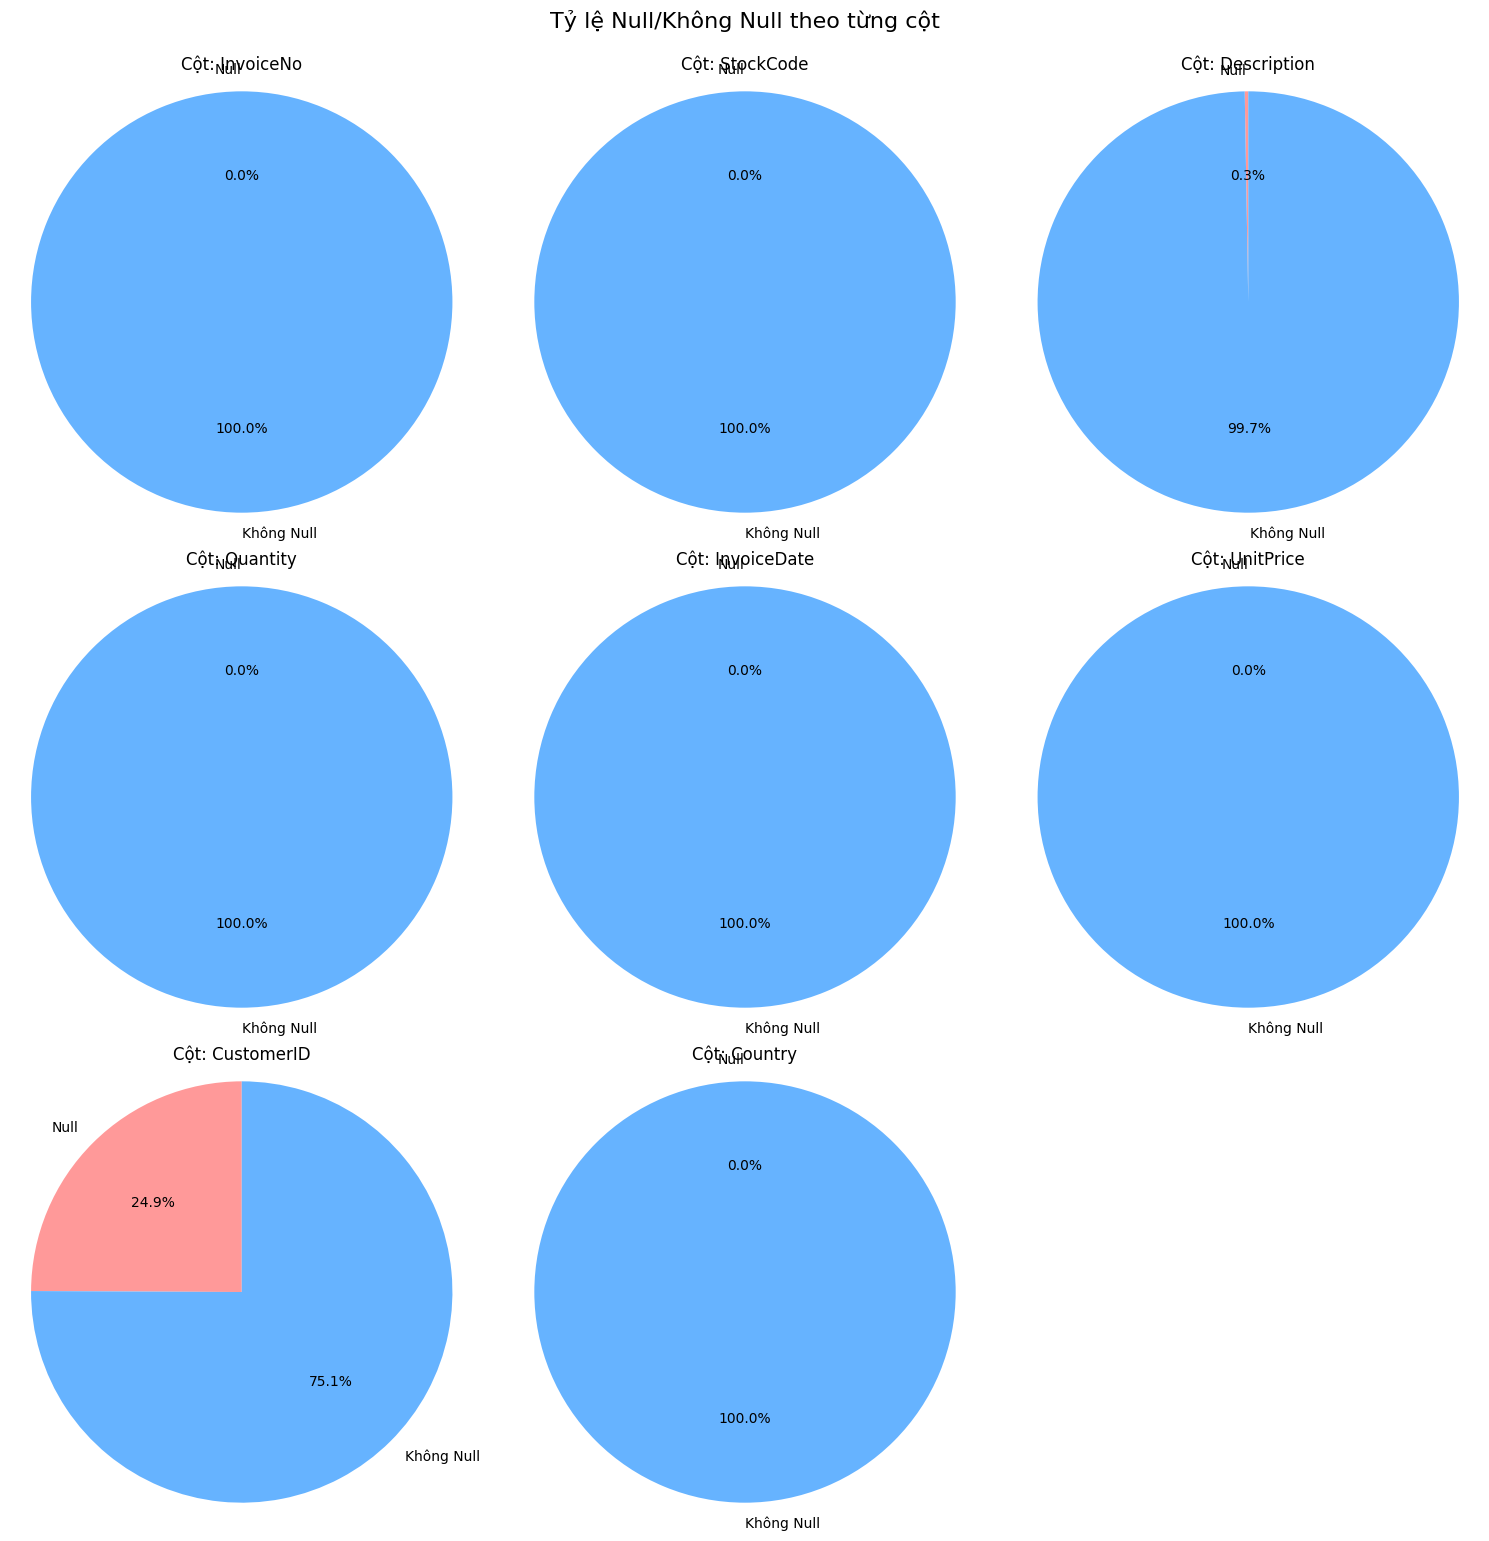

In [53]:
cols = data.columns
num_cols = len(cols)

# Thiết lập kích thước hiển thị phù hợp
plt.figure(figsize=(5 * 3, 5 * ((num_cols + 2) // 3)))

for i, col in enumerate(cols, 1):
  null_count = data[col].isnull().sum()
  not_null_count = len(data) - null_count
  sizes = [null_count, not_null_count]
  labels = ['Null', 'Không Null']
  colors = ['#ff9999', '#66b3ff']
  plt.subplot((num_cols + 2) // 3, 3, i)
  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
  plt.title(f'Cột: {col}')
  plt.axis('equal')

plt.tight_layout()
plt.suptitle('Tỷ lệ Null/Không Null theo từng cột', fontsize=16, y=1.02)
plt.show()

Cho thấy số lượng dòng bị thiếu sót nằm ở cột CustomerID, có các phương pháp filling:
-  Nếu có mối quan hệ giữa IDCustomer với các cột khác có thể filling suy luận thành các ID đích danh
- Nếu không thì filling bằng -1 và xử lý như những người khách chưa đăng ký thành khách hàng thành viên, vì dữ liệu mua hàng của các khách này chiếm 1/4 doanh thu, khá là lớn và đóng vai tròn quan trọng.

Lưu ý: không xóa,Vì ảnh hưởng đến phân tích và đưa ra knowledge bussiness có thể sai lệch, không đạt hiệu quả.


Còn 0.3 value null ở cột description

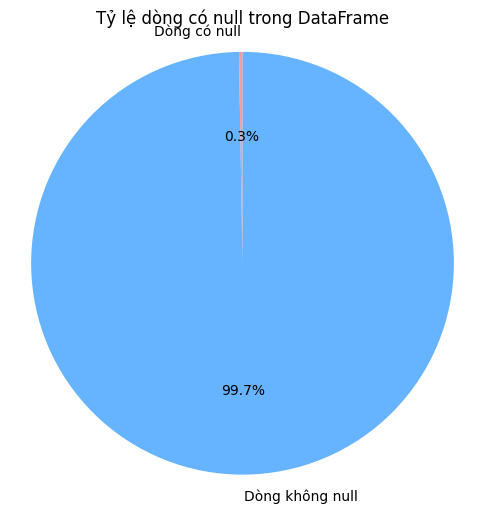

In [54]:
#Filling thành khách mua hàng không đăng ký thành viên
data['CustomerID'] = data['CustomerID'].fillna(-1)

so_dong_null = data.isnull().any(axis=1).sum()
so_dong_khong_null = tong_so_dong - so_dong_null

# Dữ liệu cho biểu đồ tròn
labels = ['Dòng có null', 'Dòng không null']
sizes = [so_dong_null, so_dong_khong_null]
colors = ['#ff9999','#66b3ff']

# Vẽ biểu đồ
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ dòng có null trong DataFrame')
plt.axis('equal')
plt.show()

In [55]:
print(data.isnull().sum())

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


- Các Description này sau quá trình kiểm tra có những value NaN và không có StockCode nào để fill sang, và có một số Stockcode có Description nên có thể fill sang được -> fill giá trị có, và xóa giá trị không có Des nếu cùng stockcode (số lượng siêu nhỏ)

- Trong quá trình kiểm tra lại thì các description chỉ miêu tả tình trạng hoặc các note khác thôi để hiểu rõ hơn về hóa đơn, không phải là tên các mặt hàng, cùng stockcode nhưng có thể có các description khác nhau như check hoặc missing???,... => không cần fill

In [56]:
# Bước 1: Tạo từ điển ánh xạ từ StockCode sang Description (chỉ từ các dòng đã có mô tả)
#desc_map = data[~data['Description'].isnull()] \
#              .drop_duplicates(subset=['StockCode']) \
#              .set_index('StockCode')['Description'].to_dict()
#
## Bước 2: Điền Description cho các dòng bị thiếu nếu StockCode có trong map
#data['Description'] = data.apply(
#    lambda row: desc_map[row['StockCode']] if pd.isnull(row['Description']) and row['StockCode'] in desc_map else row['Description'],
#    axis=1
#)
#print(data['Description'].isnull().sum())

In [57]:
#Số lượng rất nhỏ, gần như là 0% trong tổng thể(112)
#Có thể xóa đi
#data = data.dropna(subset=['Description'])
#Đã xóa và còn 0
#Kiểm tra lại biểu đồ cho từng cột thì không còn giá trị null

##Invalid value

Sau khi xử lý quá trình null trong quá trình kiểm tra thì cho thấy có một số cột quantity và unitprice lại có giá 0.0 hoặc quantity là số âm

In [58]:
# Lọc các dòng có Quantity <= 0
quantity_le_zero = data[data['Quantity'] <= 0]

# Hiển thị số lượng dòng
print(f"Số dòng có Quantity <= 0: {len(quantity_le_zero)}")

# Hiển thị các dòng đó (cột Quantity)
print(quantity_le_zero.head())


Số dòng có Quantity <= 0: 10624
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

         InvoiceDate  UnitPrice  CustomerID         Country  
141   12/1/2010 9:41      27.50     14527.0  United Kingdom  
154   12/1/2010 9:49       4.65     15311.0  United Kingdom  
235  12/1/2010 10:24       1.65     17548.0  United Kingdom  
236  12/1/2010 10:24       0.29     17548.0  United Kingdom  
237  12/1/2010 10:24       0.29     17548.0  United Kingdom  


Trường hợp giá trị quantity < 0:
- Các Đơn hàng được hoàn trả tiền, có ký hiệu C đầu tiên trong InvoiceNo
- Các Đơn hàng bị hủy hoặc lỗi, có unit price = 0

Cần một cột ký hiệu để nhận dạng các cột này => thanh toán thành công(Transaction), hoàn trả(Refund) và hủy (Cancel)

Ngoài ra ở quantity >0 và UnitPrice = 0 có 2 trường hợp:
- số lượng bé có thể là hàng tặng, khuyến mãi cho khách hàng(Gift)
- số lượng lớn là Nhập/xuất kho(- = Import/+ = Export)

Ở cột Stockcode, có trường hợp đặc biệt:
- Một ký tự S, là hàng mẫu(có thể xem là chi phí marketing)(Sample)
- Một chữ POST, thường là chi phí vận chuyển (POST)

Đặc biệt UnitPrice < 0 là nợ xấu (Adjust bad debt)


In [59]:
quantity_UnitPr = data[(data['Quantity'] > 0) & (data['UnitPrice'] == 0) & (data['CustomerID'] < 0)]
print(quantity_UnitPr.head())
print(len(quantity_UnitPr))

     InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970    536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971    536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972    536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987    536549    85226A         NaN         1  12/1/2010 14:34        0.0   

      CustomerID         Country  
622         -1.0  United Kingdom  
1970        -1.0  United Kingdom  
1971        -1.0  United Kingdom  
1972        -1.0  United Kingdom  
1987        -1.0  United Kingdom  
1139


In [60]:
invoices_with_zero_price = data[data['UnitPrice'] == 0]['InvoiceNo'].unique()

# Bước 2: Lọc toàn bộ các dòng thuộc các hóa đơn đó
result = data[data['InvoiceNo'].isin(invoices_with_zero_price)]

# Tùy chọn: sắp xếp để dễ xem
result = result.sort_values(by='InvoiceNo')

# In hoặc lưu kết quả
print(result)

       InvoiceNo StockCode                   Description  Quantity  \
622       536414     22139                           NaN        56   
1970      536545     21134                           NaN         1   
1971      536546     22145                           NaN         1   
1972      536547     37509                           NaN         1   
1987      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
536981    581234     72817                           NaN        27   
538504    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                           NaN        20   
538919    581422     23169                       smashed      -235   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52        0.0        -1.0  United Kingdom  
1970    12/1/2010 14:32      

##Filling

In [65]:
import pandas as pd

def get_status(row):
    invoice = str(row['InvoiceNo'])
    stock = str(row['StockCode'])
    qty = row['Quantity']
    price = row['UnitPrice']

    if invoice.startswith("A"):
        return "Debt"
    elif stock == "S":
        return "Sample"
    elif stock == "POST":
        return "Postage"
    elif qty < 0 and invoice.startswith("C"):
        return "Refund"
    elif qty < 0 and price == 0:
        return "Cancel"
    elif qty > 0 and price == 0:
        if qty <= 20:
            return "Gift"
        else:
            return "Export"
    elif qty < 0 and price == 0 and abs(qty) > 20:
        return "Import"
    else:
        return "Transaction"

# Tạo cột Status
data['Status'] = data.apply(get_status, axis=1)
data.to_csv('Data_PreProcessing.csv', index=False, encoding='latin-1')